In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [134]:
df_train = pd.read_csv('../data/raw/train.csv',index_col=None)

In [137]:
#----------------------------------   DATA PREPROCESSING  -----------------------------
# to be run on dataframe before applying model 

#data cleaning
df_train = df_train.drop(['PoolQC'],axis=1)
df_train = df_train.drop(['MiscFeature'],axis=1)
df_train = df_train.drop(['Id'],axis=1)

#missing values
df_train['Fence'] = df_train['Fence'].fillna(value='NoFence')
df_train['Alley'] = df_train['Alley'].fillna(value='NoAlley')
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna(value='NoFirePl')
df_train['LotFrontage']=df_train['LotFrontage'].fillna(value=df_train['LotFrontage'].mean())
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(value=df_train['MasVnrArea'].mean())
df_train['BsmtFinSF2']=df_train['BsmtFinSF2'].fillna(value=df_train['BsmtFinSF2'].mean())


#categorical
df_train = pd.get_dummies(df_train,drop_first=True)
df_train = pd.get_dummies(data=df_train,columns=['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'],drop_first=True)
#--- end

In [138]:
df_train.describe()

LotFrontage        LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     70.049958   10516.828082     6.099315     5.575342   103.685262   
std      22.024023    9981.264932     1.382997     1.112799   180.569112   
min      21.000000    1300.000000     1.000000     1.000000     0.000000   
25%      60.000000    7553.500000     5.000000     5.000000     0.000000   
50%      70.049958    9478.500000     6.000000     5.000000     0.000000   
75%      79.000000   11601.500000     7.000000     6.000000   164.250000   
max     313.000000  215245.000000    10.000000     9.000000  1600.000000   

        BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    443.639726    46.549315   567.240411  1057.429452  1162.626712  ...   
std     456.098091   161.319273   441.866955   438.705324   386.587738  ...   
min       0.000000     0.000000     0.000000     0.000000   334.000000  ...   
25%       0.000000     0.000000   223.000000   795.750000   882.000000  ...   
50%     383.500000     0.000000   477.500000   991.500000  1087.000000  ...   
75%     712.250000     0.000000   808.000000  1298.250000  1391.250000  ...   
max    5644.000000  1474.000000  2336.000000  6110.000000  4692.000000  ...   

          MoSold_7     MoSold_8     MoSold_9    MoSold_10    MoSold_11  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.160274     0.083562     0.043151     0.060959     0.054110   
std       0.366986     0.276824     0.203266     0.239337     0.226311   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         MoSold_12  YrSold_2007  YrSold_2008  YrSold_2009  YrSold_2010  
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  
mean      0.040411     0.225342     0.208219     0.231507     0.119863  
std       0.196989     0.417951     0.406174     0.421940     0.324913  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 534 columns]

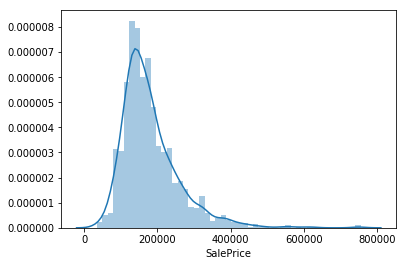

In [141]:
sns.distplot(df_train['SalePrice'])

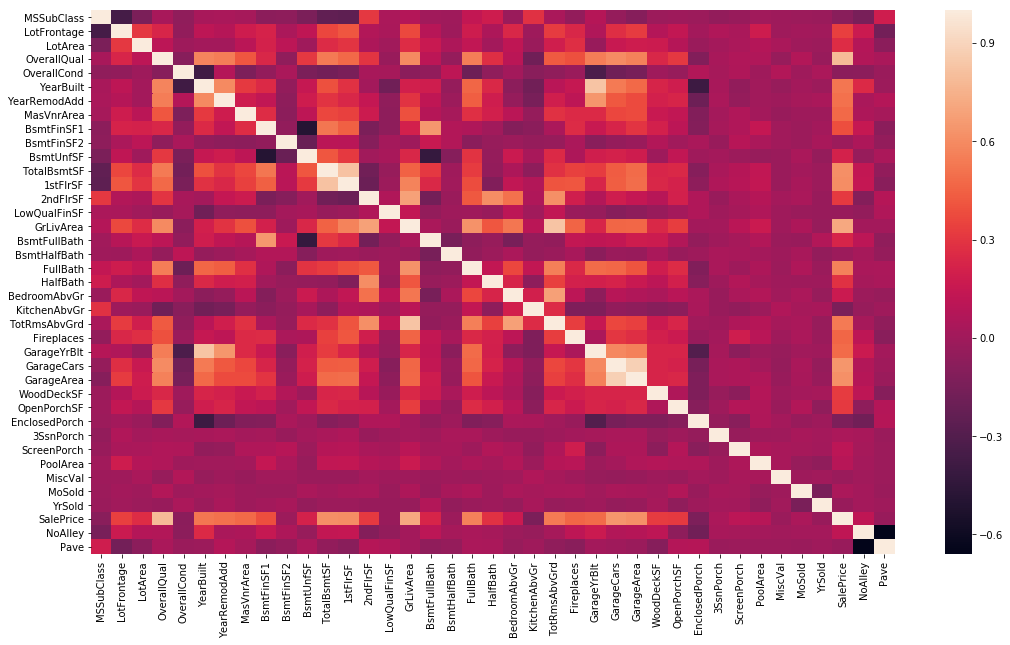

In [82]:
plt.figure(figsize = (18,10))
sns.heatmap(df_train.corr())

In [171]:
# --------------------------------   DATA SPLIT  -------------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('SalePrice',axis=1), 
                                                    df_train['SalePrice'], test_size=0.25, 
                                                    random_state=101)

In [143]:
# --------------------------------   MODELING  -------------------------
# train
from sklearn.ensemble import RandomForestRegressor

In [166]:
regr = RandomForestRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [167]:
# predict
predictions = regr.predict(X_test) 

In [168]:
# precition
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 
print('Root Mean Squared Logarithmic Error:', np.sqrt(metrics.mean_squared_log_error(y_test, predictions))) 

Mean Absolute Error: 18054.086904109587
Mean Squared Error: 1000361931.8805695
Root Mean Squared Error: 31628.49872947765
Root Mean Squared Logarithmic Error: 0.16391264999153082


In [191]:
df_test = pd.read_csv('../data/raw/test.csv',index_col=None)

In [193]:
#----------------------------------   DATA PREPROCESSING  -----------------------------
# to be run on dataframe before applying model 

df_test_IDs = df_test.pop('Id')

#data cleaning
df_test = df_test.drop(['PoolQC'],axis=1)
df_test = df_test.drop(['MiscFeature'],axis=1)
#df_test = df_test.drop(['Id'],axis=1)

#missing values
df_test['Fence'] = df_test['Fence'].fillna(value='NoFence')
df_test['Alley'] = df_test['Alley'].fillna(value='NoAlley')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna(value='NoFirePl')
df_test['LotFrontage']=df_test['LotFrontage'].fillna(value=df_test['LotFrontage'].mean())
df_test['MasVnrArea']=df_test['MasVnrArea'].fillna(value=df_test['MasVnrArea'].mean())
df_test['BsmtFinSF1']=df_test['BsmtFinSF1'].fillna(value=df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2']=df_test['BsmtFinSF2'].fillna(value=df_test['BsmtFinSF2'].mean())
df_test['BsmtUnfSF']=df_test['BsmtUnfSF'].fillna(value=df_test['BsmtUnfSF'].mean())
df_test['TotalBsmtSF']=df_test['TotalBsmtSF'].fillna(value=df_test['TotalBsmtSF'].mean())
df_test['BsmtFullBath']=df_test['BsmtFullBath'].fillna(value=df_test['BsmtFullBath'].mean())
df_test['BsmtHalfBath']=df_test['BsmtHalfBath'].fillna(value=df_test['BsmtHalfBath'].mean())
df_test['GarageCars']=df_test['GarageCars'].fillna(value=df_test['GarageCars'].mean())
df_test['GarageArea']=df_test['GarageArea'].fillna(value=df_test['GarageArea'].mean())

#categorical
df_test = pd.get_dummies(df_test,drop_first=True)
df_test = pd.get_dummies(data=df_test,columns=['MSSubClass','YearBuilt','YearRemodAdd','GarageYrBlt','MoSold','YrSold'],drop_first=True)

# Get missing columns in the training test
missing_cols = set( df_train.columns ) - set( df_test.columns )
for c in missing_cols:
    df_test[c] = 0
df_test = df_test[df_train.columns]
df_test = df_test.drop(['SalePrice'],axis=1)
#--- end

In [197]:
test_pred = regr.predict(df_test)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [199]:
df_submission = pd.concat([df_test_IDs, pd.Series(test_pred)], axis=1)
df_submission.columns = ['Id', 'SalePrice']
df_submission.to_csv('../models/1-sk-submission.csv', index=False)